<a href="https://colab.research.google.com/github/smkim0508/COS486-Notes/blob/main/inhibitorypair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interactive simulation of mutually inhibitory pair of neurons
Sebastian Seung\
COS 486\
February 2026

## Differential Equations

The system consists of two neurons with activities $x_1$ and $x_2$, governed by:

$$\frac{dx_1}{dt} + x_1 = [b_1 - \beta x_2]^+$$

$$\frac{dx_2}{dt} + x_2 = [b_2 - \beta x_1]^+$$

where:
- $b_1, b_2$ are external inputs to each neuron
- $\beta \geq 0$ is the strength of mutual inhibition
- $[z]^+ = \max(z, 0)$ is the rectification nonlinearity
- The time constant $\tau$ is set to 1

## Euler method
The simulation uses Euler discretization with time step $\Delta t$:

$$x_i(t + \Delta t) = (1 - \Delta t)\, x_i(t) + \Delta t \, [b_i - \beta x_j(t)]^+$$

## GUI
The GUI uses the widget backend for matplotlib, so you may need to install ipympl.

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display

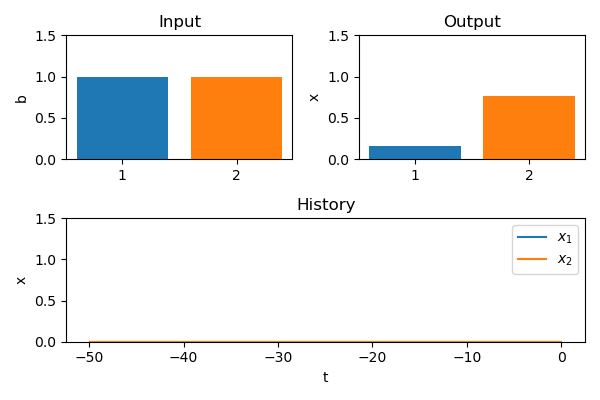

In [ ]:
# Simulation parameters
n = 2
dt = 0.1
x = np.random.rand(n)
history_len = 500
x_history = np.zeros((history_len, n))
colors = ['tab:blue', 'tab:orange']

# Widgets
beta_slider = widgets.FloatSlider(value=0.8, min=0.0, max=3.0, step=0.1, description='beta:')
b1_slider = widgets.FloatSlider(value=1.0, min=0.0, max=1.5, step=0.1, description='b1:')
b2_slider = widgets.FloatSlider(value=1.0, min=0.0, max=1.5, step=0.1, description='b2:')

randomize_btn = widgets.Button(description='Randomize x')
zero_btn = widgets.Button(description='Zero x')

def randomize_x(_):
    global x
    x = np.random.rand(n)

def zero_x(_):
    global x
    x = np.zeros(n)

randomize_btn.on_click(randomize_x)
zero_btn.on_click(zero_x)

# Layout
sliders = widgets.VBox([beta_slider, b1_slider, b2_slider])
buttons = widgets.VBox([randomize_btn, zero_btn])
controls = widgets.HBox([sliders, buttons])
display(controls)

# Set up figure with GridSpec
fig = plt.figure(figsize=(6, 4))
fig.canvas.header_visible = False
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax_input = fig.add_subplot(gs[0, 0])
ax_state = fig.add_subplot(gs[0, 1])
ax_history = fig.add_subplot(gs[1, :])

bars_b = ax_input.bar([1, 2], [1, 1], color=colors)
bars_x = ax_state.bar([1, 2], x, color=colors)
ax_input.set_ylabel('b')
ax_input.set_ylim(0, 1.5)
ax_input.set_xticks([1, 2])
ax_input.set_title('Input')
ax_state.set_ylabel('x')
ax_state.set_ylim(0, 1.5)
ax_state.set_xticks([1, 2])
ax_state.set_title('Output')

# Time series plot
t = np.arange(-history_len + 1, 1) * dt
line1, = ax_history.plot(t, x_history[:, 0], color=colors[0], label='$x_1$')
line2, = ax_history.plot(t, x_history[:, 1], color=colors[1], label='$x_2$')
ax_history.set_xlabel('t')
ax_history.set_ylabel('x')
ax_history.set_ylim(0, 1.5)
ax_history.set_title('History')
ax_history.legend(loc='upper right')
plt.tight_layout()

def update(frame):
    global x, x_history
    beta = beta_slider.value
    b = np.array([b1_slider.value, b2_slider.value])

    # Dynamics
    x = (1.0 - dt) * x + dt * np.maximum(b - beta * x[::-1], 0)

    # Update history (shift left and append new value)
    x_history[:-1] = x_history[1:]
    x_history[-1] = x

    # Update bars
    for bar, val in zip(bars_b, b):
        bar.set_height(val)
    for bar, val in zip(bars_x, x):
        bar.set_height(val)

    # Update time series
    line1.set_ydata(x_history[:, 0])
    line2.set_ydata(x_history[:, 1])

    return list(bars_b) + list(bars_x) + [line1, line2]

ani = FuncAnimation(fig, update, interval=50, cache_frame_data=False)
plt.show()